In [ ]:
pip install deepface

In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

# 1.Face Detection

* https://github.com/serengil/deepface

This notebook is using deepface framework of python to detect and carry out analysis on facial data.
The deepface framework has many different backends to cary out different functionalities.Some of these include- opencv, ssd,dlib,retinaface,mediapipe

In [3]:
backends=["opencv","ssd","dlib","mtcnn","retinaface","mediapipe"]
face=DeepFace.detectFace(r"C:\Users\HP\OneDrive\Desktop\LieDetector\LieDetection\data1\st1.jpg",
                    target_size=(224, 224),
                   detector_backend="opencv")

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


In [4]:
# converting the detected face to numpy array
face


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

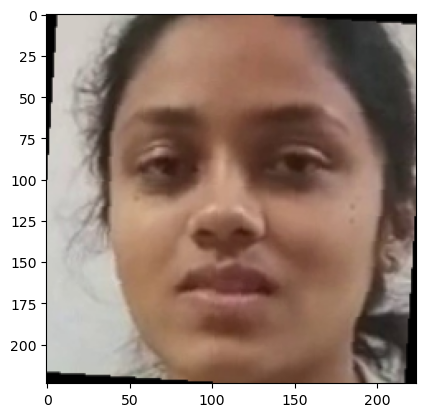

In [5]:
# plotting the image of the detected face
plt.imshow(face)

# Compare different backends

We will detect face by each of these backends.The try catch handles the case when a backend library does not have the detection feature

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: C:\Users\HP\.deepface\weights\deploy.prototxt
28.1kB [00:00, 30.6MB/s]                                                                                               


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: C:\Users\HP\.deepface\weights\res10_300x300_ssd_iter_140000.caffemodel
100%|█████████████████████████████████████████████████████████████████████████████| 10.7M/10.7M [00:03<00:00, 2.90MB/s]


⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
1/1 [==============================] - 0s 201ms/step
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


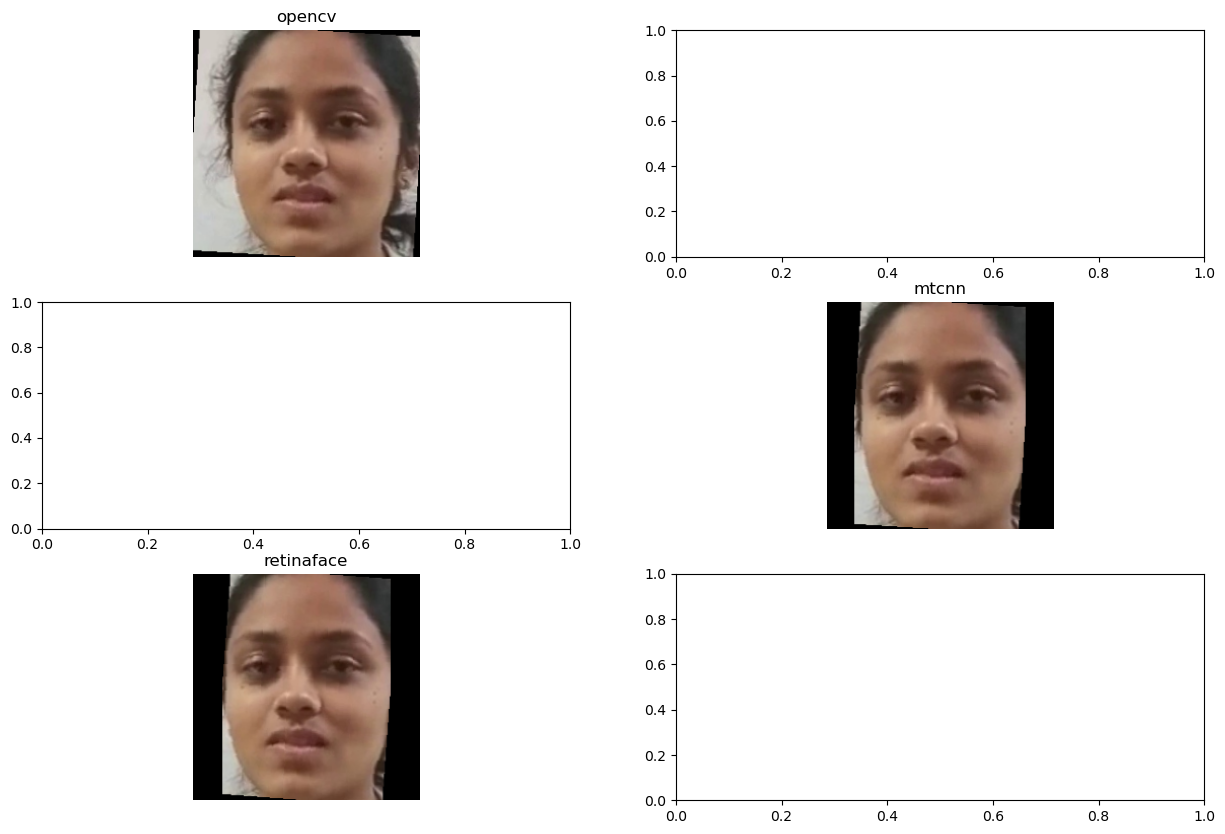

In [6]:
fig,axs=plt.subplots(3,2,figsize=(15,10))
axs=axs.flatten()
for i,b in enumerate(backends):
    try:
        face=DeepFace.detectFace(r"C:\Users\HP\OneDrive\Desktop\LieDetector\LieDetection\data1\st1.jpg",
                                 target_size=(224,224),
                                 detector_backend=b)
        axs[i].imshow(face)
        axs[i].set_title(b)
        axs[i].axis('off')
    except:
        pass
plt.show()

# Facial Attribute Analysis

In [7]:
result=DeepFace.analyze(r"C:\Users\HP\OneDrive\Desktop\LieDetector\LieDetection\data1\st2.jpg",actions=('emotion'))

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


In [ ]:
# truth data analysis
lst=[]
for i in range(1,147):
    path=r"C:\Users\HP\OneDrive\Desktop\LieDetector\LieDetection\data2\st"+str(i)+".jpg"
    result=DeepFace.analyze(path,actions=('emotion'))
    print(result[0]['dominant_emotion'])
    lst.append(result[0]['dominant_emotion']);


In [ ]:
lst

In [13]:
import pandas as pd

In [27]:
emotion=pd.DataFrame(lst,columns=["type"])

In [28]:
emotion.head()

,type
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral


In [29]:
#counting number of each emotion
ecount=emotion["type"].value_counts()

In [30]:
ecount

neutral    146
Name: type, dtype: int64

<Axes: >

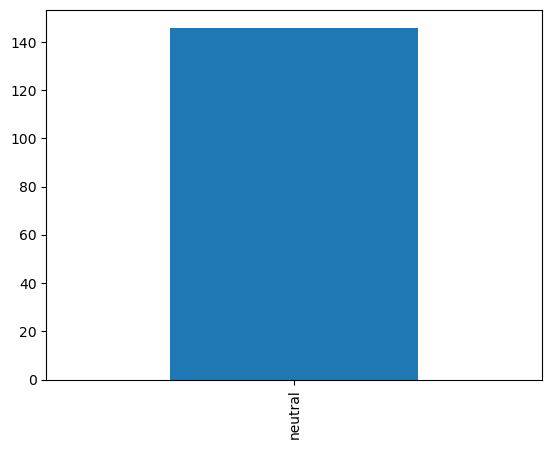

In [54]:
# plotting vcounts
pd.value_counts(emotion["type"]).plot.bar()

In [ ]:
#lie data analysis
lst1=[]
for i in range(1,47):
    path=r"C:\Users\HP\OneDrive\Desktop\LieDetector\LieDetection\data1\st"+str(i)+".jpg"
    result=DeepFace.analyze(path,actions=('emotion'))
    print(result[0]['dominant_emotion'])
    lst1.append(result[0]['dominant_emotion']);

In [ ]:
lst1

In [33]:
emotion1=pd.DataFrame(lst1,columns=["type"])

In [36]:
emotion1.head()

,type
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral


In [39]:
#counting number of each emotion
ecount1=emotion1["type"].value_counts()

In [40]:
ecount1

neutral     32
fear         1
angry        1
surprise     1
Name: type, dtype: int64

In [73]:
# fear to neutral ratio has increased from 0 to 0.03125
ecount1[1]/ecount1[0]

0.03125

<Axes: >

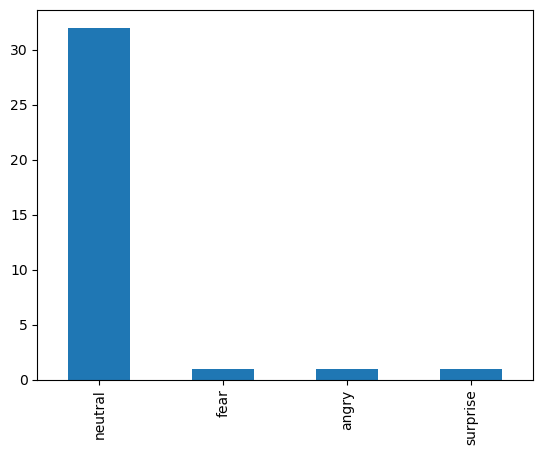

In [55]:
pd.value_counts(emotion1["type"]).plot.bar()

In [ ]:
# Rajshree truth analysis
lst3=[]
for i in range(1,418):
    path=r"C:\Users\HP\OneDrive\Desktop\LieDetector\LieDetection\data3\rs"+str(i)+".jpg"
    result=DeepFace.analyze(path,actions=('emotion'))
    print(result[0]['dominant_emotion'])
    lst3.append(result[0]['dominant_emotion']);

In [59]:
emotion2=pd.DataFrame(lst3,columns=["type"])

In [60]:
emotion2.head()

,type
0,neutral
1,fear
2,neutral
3,neutral
4,neutral


<Axes: >

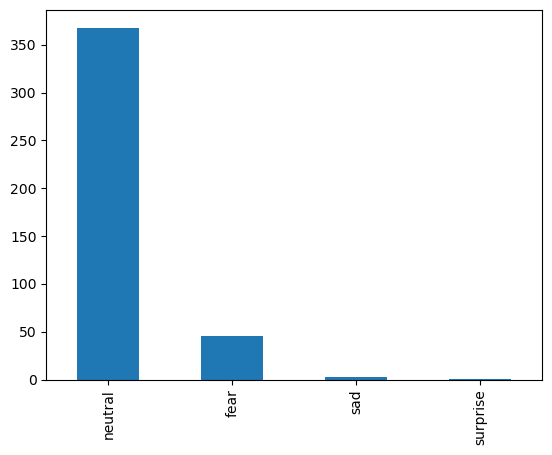

In [61]:
ecount2=emotion2["type"].value_counts()
pd.value_counts(emotion2["type"]).plot.bar()

In [71]:
# calculating fear to neutral ratio
ecount2[1]/ecount2[0]

0.12228260869565218

In [ ]:
# Rajshree lie analysis
lst4=[]
for i in range(1,151):
    path=r"C:\Users\HP\OneDrive\Desktop\LieDetector\LieDetection\data4\rs"+str(i)+".jpg"
    result=DeepFace.analyze(path,actions=('emotion'))
    print(result[0]['dominant_emotion'])
    lst4.append(result[0]['dominant_emotion']);

<Axes: >

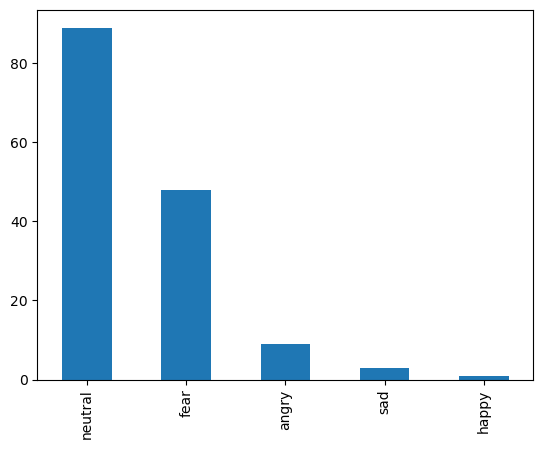

In [63]:
emotion3=pd.DataFrame(lst4,columns=["type"])
ecount3=emotion3["type"].value_counts()
pd.value_counts(emotion3["type"]).plot.bar()

In [69]:
ecount3

neutral    89
fear       48
angry       9
sad         3
happy       1
Name: type, dtype: int64

In [72]:
#fear to neutral ratio has increased significantly
ecount3[1]/ecount3[0]

0.5393258426966292